# **Projet trouve ton job : modélisation**

## Installations
---

In [27]:
!pip install pyinputplus
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


## Imports
---

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#Bibliothèque pour la liste déroulante
import pyinputplus as pyip
import ipywidgets as widgets
from ipywidgets import interact
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# machine learning - scikit learn:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV

# mount GoogleDrive and set the files path
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Projet Python - Trouve ton job'

path = os.getcwd()
print(f"Le répertoire courant est : {path} \n")

url = "df_travail_poste.csv"
csvExtract = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Projet Python - Trouve ton job
Le répertoire courant est : /content/drive/MyDrive/Projet Python - Trouve ton job 



In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Fonctions
---

In [30]:
def correlation(dataframe, method):
  liste = []
  corr = dataframe.corr(method = method)
  colonnesIndex = corr.index
  colonnesNoms = corr.columns
  for colonne in colonnesIndex:
    for colonne2 in colonnesNoms:
      if colonne != colonne2:
        trie = [colonne, colonne2]
        trie.sort()
        liste.append([trie[0], trie[1], corr.loc[colonne, colonne2]])
  return pd.DataFrame(liste, columns=["col1", "col2", "values"]).drop_duplicates(["col1", "col2"])

In [31]:
def tauxDeRemplissage(df):
  return (df.notna().sum()*100/len(df)).sort_values()

## Main
---

### Exploration des données

In [54]:
#re-set l'index 
print(csvExtract.columns)

if csvExtract.columns[0] == "Unnamed: 0":
  csvExtract=csvExtract.rename({"Unnamed: 0":"Index"}, axis='columns')
  csvExtract=csvExtract.set_index('Index')

if csvExtract.columns[0] == "Unnamed: 0.1":
  csvExtract=csvExtract.rename({"Unnamed: 0.1":"Index"}, axis='columns')
  csvExtract=csvExtract.set_index('Index')

print(csvExtract.columns)

Index(['Unnamed: 0', 'Date de publication', 'Intitulé du poste', 'Compétences',
       'Lieu', 'Salaire minimum', 'Salaire maximum', 'Type de contrat',
       'Nom de la société', 'Poste', 'Poste_class', 'Niveau'],
      dtype='object')
Index(['Date de publication', 'Intitulé du poste', 'Compétences', 'Lieu',
       'Salaire minimum', 'Salaire maximum', 'Type de contrat',
       'Nom de la société', 'Poste', 'Poste_class', 'Niveau'],
      dtype='object')


In [55]:
#quelques infos
csvExtract.info()
print(f"\n{tauxDeRemplissage(csvExtract)}\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date de publication  230 non-null    object 
 1   Intitulé du poste    230 non-null    object 
 2   Compétences          229 non-null    object 
 3   Lieu                 230 non-null    object 
 4   Salaire minimum      43 non-null     float64
 5   Salaire maximum      43 non-null     float64
 6   Type de contrat      230 non-null    object 
 7   Nom de la société    228 non-null    object 
 8   Poste                230 non-null    object 
 9   Poste_class          230 non-null    object 
 10  Niveau               230 non-null    object 
dtypes: float64(2), object(9)
memory usage: 21.6+ KB

Salaire minimum         18.695652
Salaire maximum         18.695652
Nom de la société       99.130435
Compétences             99.565217
Date de publication    100.000000
Intitulé du poste    

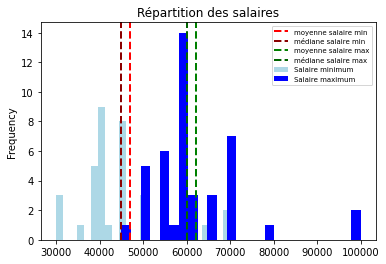

In [34]:
 #répartition des salaires
salaireMin = csvExtract['Salaire minimum']
salaireMin.plot.hist(title='Répartition des salaires', color='lightblue', bins=25)  
plt.axvline(salaireMin.mean(), color='red', linestyle='dashed', linewidth=2, label='moyenne salaire min')
plt.axvline(salaireMin.median(), color='darkred', linestyle='dashed', linewidth=2, label='médiane salaire min')

salaireMax = csvExtract['Salaire maximum']
salaireMax.plot.hist(title='Répartition des salaires', color='blue', bins=25)  
plt.axvline(salaireMax.mean(), color='green', linestyle='dashed', linewidth=2, label='moyenne salaire max')
plt.axvline(salaireMax.median(), color='darkgreen', linestyle='dashed', linewidth=2, label='médiane salaire max')

plt.legend(fontsize=7)

plt.show()

In [35]:
print(correlation(csvExtract, "kendall"))

              col1             col2    values
0  Salaire minimum       Unnamed: 0 -0.373193
1  Salaire maximum       Unnamed: 0 -0.283859
3  Salaire maximum  Salaire minimum  0.678859


In [56]:
#dataframe en amont du modèle
csvExtract

,Date de publication,Intitulé du poste,Compétences,Lieu,Salaire minimum,Salaire maximum,Type de contrat,Nom de la société,Poste,Poste_class,Niveau
Index,,,,,,,,,,,
0,2022-12-25,Data Analyst - Publicité,"sql, t-sql, outils",paris,NaN,NaN,CDI,sept lieues,Data analyst,Data,Analyst
1,2022-12-16,Data analyst - H/F,"support, outils, agile, design, big data",paris,NaN,NaN,CDI,edf france,Data analyst,Data,Analyst
2,2022-12-19,Customer Data Analyst (H/F),"crm, data quality, sql, sas, python",paris,NaN,NaN,CDI,hermes,Data analyst,Data,Analyst
3,2022-12-25,Master Data Analyst H/F,"si, support, sap",moussy,NaN,NaN,CDI,tereos,Data analyst,Data,Analyst
4,2023-01-12,Portfolio Data Analyst H/F,"outils, support, decisionnel, sql, test",île-de-france,NaN,NaN,CDI,safran,Data analyst,Data,Analyst
5,2022-12-31,Data Analyst BO/Qlick Sense (h/f),"support, sql, data management, business object...",maisons-alfort,45000.0,50000.0,CDD/Intérim,fed it,Data analyst,Data,Analyst
6,2022-12-18,Product Data Analyst - BI - H/F,"cloud, paas, qlik, iaas, support",paris,NaN,NaN,CDI,cegid,Data analyst,Data,Analyst
7,2022-12-16,Data Analyst / Chef de Projet BI (h/f),"data management, business intelligence, bases ...",paris,60000.0,62000.0,CDI,fed it,Data analyst,Data,Managment
8,2023-01-14,Business analyst senior DATA CRM - Paris H/F,"crm, agile, decisionnel, réseau, réseau",paris,NaN,NaN,CDI,credit agricole,Data analyst,Data,Analyst


### Création du menu déroulant pour filtrage


In [38]:
df_exploded=pd.DataFrame()
df_exploded[["comp1", "comp2", "comp3", "comp4", "comp5"]] = csvExtract["Compétences"].str.split(',', expand=True)
df_exploded.fillna("", inplace=True)
df_exploded

,comp1,comp2,comp3,comp4,comp5
0,sql,t-sql,outils,,
1,support,outils,agile,design,big data
2,crm,data quality,sql,sas,python
3,si,support,sap,,
4,outils,support,decisionnel,sql,test
5,support,sql,data management,business objects,t-sql
6,cloud,paas,qlik,iaas,support
7,data management,business intelligence,bases de données,,
8,crm,agile,decisionnel,réseau,réseau
9,big data,scrum,intelligence artificielle,electronique,maintenance


In [39]:
df_pour_tri = csvExtract.join(df_exploded)
df_pour_tri

,Unnamed: 0,Date de publication,Intitulé du poste,Compétences,Lieu,Salaire minimum,Salaire maximum,Type de contrat,Nom de la société,Poste,Poste_class,Niveau,comp1,comp2,comp3,comp4,comp5
0,0,2022-12-25,Data Analyst - Publicité,"sql, t-sql, outils",paris,NaN,NaN,CDI,sept lieues,Data analyst,Data,Analyst,sql,t-sql,outils,,
1,1,2022-12-16,Data analyst - H/F,"support, outils, agile, design, big data",paris,NaN,NaN,CDI,edf france,Data analyst,Data,Analyst,support,outils,agile,design,big data
2,2,2022-12-19,Customer Data Analyst (H/F),"crm, data quality, sql, sas, python",paris,NaN,NaN,CDI,hermes,Data analyst,Data,Analyst,crm,data quality,sql,sas,python
3,3,2022-12-25,Master Data Analyst H/F,"si, support, sap",moussy,NaN,NaN,CDI,tereos,Data analyst,Data,Analyst,si,support,sap,,
4,4,2023-01-12,Portfolio Data Analyst H/F,"outils, support, decisionnel, sql, test",île-de-france,NaN,NaN,CDI,safran,Data analyst,Data,Analyst,outils,support,decisionnel,sql,test
5,5,2022-12-31,Data Analyst BO/Qlick Sense (h/f),"support, sql, data management, business object...",maisons-alfort,45000.0,50000.0,CDD/Intérim,fed it,Data analyst,Data,Analyst,support,sql,data management,business objects,t-sql
6,6,2022-12-18,Product Data Analyst - BI - H/F,"cloud, paas, qlik, iaas, support",paris,NaN,NaN,CDI,cegid,Data analyst,Data,Analyst,cloud,paas,qlik,iaas,support
7,7,2022-12-16,Data Analyst / Chef de Projet BI (h/f),"data management, business intelligence, bases ...",paris,60000.0,62000.0,CDI,fed it,Data analyst,Data,Managment,data management,business intelligence,bases de données,,
8,8,2023-01-14,Business analyst senior DATA CRM - Paris H/F,"crm, agile, decisionnel, réseau, réseau",paris,NaN,NaN,CDI,credit agricole,Data analyst,Data,Analyst,crm,agile,decisionnel,réseau,réseau
9,9,2023-01-02,Data scientist / Analyst and software developm...,"big data, scrum, intelligence artificielle, el...",rueil-malmaison,NaN,NaN,Stage,vinci,Data analyst,Data,Analyst,big data,scrum,intelligence artificielle,electronique,maintenance


In [40]:
#essai numéro 2 : filtre sur deux colonnes
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

dropdown_col1 = widgets.Dropdown(
    options=[(col, col) for col in df_pour_tri['Poste'].unique()],
    value=df_pour_tri['Poste'].min(),
    description='Col1:',
)

dropdown_col2 = widgets.Dropdown(
    options=[(col, col) for col in df_pour_tri['Niveau'].unique()],
    value=df_pour_tri['Niveau'].min(),
    description='Col2:',
)

out = widgets.Output()

def update_table(change):
    out.clear_output()
    col1_value = dropdown_col1.value
    col2_value = dropdown_col2.value
    filtered_df = df_pour_tri[(df_pour_tri['Poste'] == col1_value) & (df_pour_tri['Niveau'] == col2_value)]
    if filtered_df.empty:
        filtered_df = df_pour_tri[df_pour_tri['Poste'] == col1_value]
    with out:
        display(filtered_df)
    return filtered_df

dropdown_col1.observe(update_table, 'value')
dropdown_col2.observe(update_table, 'value')

display(dropdown_col1, dropdown_col2, out)

filtered=update_table(None)
filtered

Dropdown(description='Col1:', index=29, options=(('Data analyst', 'Data analyst'), ('Data ingenier', 'Data ing…

Dropdown(description='Col2:', options=(('Analyst', 'Analyst'), ('Managment', 'Managment'), ('Ingénieur', 'Ingé…

Output()

,Unnamed: 0,Date de publication,Intitulé du poste,Compétences,Lieu,Salaire minimum,Salaire maximum,Type de contrat,Nom de la société,Poste,Poste_class,Niveau,comp1,comp2,comp3,comp4,comp5
132,132,2023-01-01,Expert technique H/F,"sécurité, securité, outils, windows, communica...",paray-vieille-poste,NaN,NaN,CDD/Intérim,ergalis,Auditeur/Expert,Support,Expert,sécurité,securité,outils,windows,communication
204,204,2022-12-25,AUDITEUR INTERNE - FILIERE RISQUES-(H/F),"sécurité, securité, communication, méthodologie",la-defense,NaN,NaN,CDI,societe generale,Auditeur/Expert,Support,Expert,sécurité,securité,communication,méthodologie,


In [41]:
#essai numéro 3 : filtre sur compétences

dropdown_col1 = widgets.Dropdown(
    options=[(col, col) for col in df_pour_tri['Poste'].unique()],
    value=df_pour_tri['Poste'].min(),
    description='Choix du Poste :',
)

dropdown_col2 = widgets.Dropdown(
    options=[(col, col) for col in df_pour_tri['Niveau'].unique()],
    value=None,
    description='Choix du Niveau :',
)

dropdown_col3 = widgets.Dropdown(
    options=[(col, col) for col in df_pour_tri['comp1'].unique()],
    value=None,
    description='Compétence 1 :',
)

out = widgets.Output()

def update_table(Poste, Niveau, comp1):
    col1_value = dropdown_col1.value
    col2_value = dropdown_col2.value
    col3_value = dropdown_col3.value
    
    filtered_df = df_pour_tri[(df_pour_tri['Poste'] == col1_value)]

    dropdown_col2.options = [(col, col) for col in filtered_df['Niveau'].unique()]
    if col2_value is None:
        col2_value = filtered_df['Niveau'].min()
    
    filtered_df = filtered_df[(filtered_df['Niveau'] == col2_value)]
    dropdown_col3.options = [(col, col) for col in filtered_df['comp1'].unique()]
    if col3_value is None:
        col3_value = filtered_df['comp1'].min()

    if filtered_df.empty:
        filtered_df = df_pour_tri[df_pour_tri['Poste'] == col1_value]
    
    filtered_df = filtered_df[(filtered_df['comp1'] == col3_value)]
    
    out.clear_output()
    with out:
        display(filtered_df)

interact(update_table, Poste=dropdown_col1, Niveau=dropdown_col2, comp1=dropdown_col3)

display(out)

interactive(children=(Dropdown(description='Choix du Poste :', index=29, options=(('Data analyst', 'Data analy…

Output()

### Machine Learning

In [77]:
#Définition de notre X(données) et y(target) pour salaire minimum
csvExtract = csvExtract.dropna()
y = csvExtract['Salaire minimum']
y2 = csvExtract['Salaire maximum']
X = csvExtract.drop(['Salaire minimum', 'Salaire maximum', 'Intitulé du poste'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=10)


#Création de l'étape preparation du pipeline
#vectorizer = CountVectorizer(strip_accents='unicode', tokenizer=lambda x: x.split(', '))
preparation = ColumnTransformer(
    transformers=[       
        ('data_cat',
         OneHotEncoder(handle_unknown='ignore'),
         ['Nom de la société', 'Poste', 'Poste_class', 'Niveau']), #étendre avec poste & classe de poste & niveau
        ('data_tex',
         CountVectorizer(strip_accents='unicode', tokenizer=lambda x: x.split(', ')),
         'Compétences')         
    ])

set_config(display='diagram')

#Création du pipeline
model_lm = Pipeline([('scaler', preparation),
                        ('classifier',RandomForestRegressor())])

#Entraînement du modèle
model_lm.fit(X_train, y_train);
y_pred = model_lm.predict(X_test)
print(f"La moyenne : {y_pred.mean()}")
print(f"La médiane : {np.median(y_pred)}")

print(f"r2_score : {r2_score(y_test, y_pred)*100:.2f}%")

La moyenne : 45340.769230769234
La médiane : 43300.0
r2_score : 24.93%


In [65]:
#Visionnage du pipeline
model_lm

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('data_cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nom de la société', 'Poste',
                                                   'Poste_class', 'Niveau']),
                                                 ('data_tex',
                                                  CountVectorizer(strip_accents='unicode',
                                                                  tokenizer=<function <lambda> at 0x7f19ba0ea790>),
                                                  'Compétences')])),
                ('classifier', RandomForestRegressor())])

In [78]:
#TEST DU MEILLEURE MODELE POUR SALAIRE MINIMUM & MAX
# Définition des paramètres à ajuster
param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.1, 1, 10],
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [10, 50, 100],
    },
    {
        'classifier': [SVC()],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__C': [0.1, 1, 10],
    },
    {
        'classifier': [GradientBoostingRegressor()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.5, 1.0],
        'classifier__max_depth': [1, 3, 5]
    },
    {
        'classifier': [RandomForestRegressor()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [5, 10, 20],
    },
    {
        'classifier': [SVR()],
        'classifier__kernel':['linear','rbf'],
        'classifier__C':[0.1,1,10]
    },
    {
        'classifier': [Lasso()],
        'classifier__alpha':[0.1, 1, 10]
    },
    {
        'classifier': [Ridge()],
        'classifier__alpha':[0.1, 1, 10]
    },
    {
        'classifier': [LinearRegression()],
    }
]

# Initialisation de GridSearchCV
grid = GridSearchCV(model_lm, param_grid, cv=5)
grid2 = GridSearchCV(model_lm, param_grid, cv=5)

# Entraînement du modèle
grid.fit(X_train, y_train)
grid2.fit(X_train, y2_train)

# Affichage des meilleurs paramètres salaire minimum
print("\n-----------------------------------------------------------")
print("Meilleurs paramètres : ", grid.best_params_)

predictions = grid.best_estimator_.predict(X_test)

print(predictions)
print(f"La moyenne : {predictions.mean()}")
print(f"La médiane : {np.median(predictions)}")

accuracy = grid.best_estimator_.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))


# Affichage des meilleurs paramètres salaire maximum
print("\n-----------------------------------------------------------")
print("Meilleurs paramètres : ", grid2.best_params_)

predictions2 = grid2.best_estimator_.predict(X_test)

print(predictions2)
print(f"La moyenne : {predictions2.mean()}")
print(f"La médiane : {np.median(predictions2)}")

accuracy2 = grid2.best_estimator_.score(X_test, y2_test)
print("Accuracy: {:.2f}%".format(accuracy2*100))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236799.1592789157, tolerance: 219362.5
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321505.5966972087, tolerance: 226195.83333333337
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288177.7065159289, tolerance: 262383.3333333334
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: 


-----------------------------------------------------------
Meilleurs paramètres :  {'classifier': LogisticRegression(C=0.1), 'classifier__C': 0.1}
[45000. 40000. 40000. 60000. 40000. 45000. 60000. 45000. 40000. 60000.
 60000. 60000. 40000.]
La moyenne : 48846.153846153844
La médiane : 45000.0
Accuracy: 38.46%

-----------------------------------------------------------
Meilleurs paramètres :  {'classifier': RandomForestClassifier(n_estimators=10), 'classifier__n_estimators': 10}
[60000. 55000. 70000. 50000. 55000. 60000. 65000. 60000. 60000. 65000.
 50000. 55000. 60000.]
La moyenne : 58846.153846153844
La médiane : 60000.0
Accuracy: 61.54%


In [46]:
#Navigation dans le pipeline
print(f"{model_lm['scaler'].get_params()}\n")
print(f"{model_lm['scaler'].transformers_}\n")
print(f"{model_lm['scaler'].transformers_[1]}\n")
print(f"{model_lm['scaler'].transformers_[1][1].get_feature_names()}\n")

{'n_jobs': None, 'remainder': 'drop', 'sparse_threshold': 0.3, 'transformer_weights': None, 'transformers': [('data_cat', OneHotEncoder(handle_unknown='ignore'), ['Nom de la société', 'Poste', 'Poste_class', 'Niveau']), ('data_tex', CountVectorizer(), 'Compétences')], 'verbose': False, 'verbose_feature_names_out': True, 'data_cat': OneHotEncoder(handle_unknown='ignore'), 'data_tex': CountVectorizer(), 'data_cat__categories': 'auto', 'data_cat__drop': None, 'data_cat__dtype': <class 'numpy.float64'>, 'data_cat__handle_unknown': 'ignore', 'data_cat__sparse': True, 'data_tex__analyzer': 'word', 'data_tex__binary': False, 'data_tex__decode_error': 'strict', 'data_tex__dtype': <class 'numpy.int64'>, 'data_tex__encoding': 'utf-8', 'data_tex__input': 'content', 'data_tex__lowercase': True, 'data_tex__max_df': 1.0, 'data_tex__max_features': None, 'data_tex__min_df': 1, 'data_tex__ngram_range': (1, 1), 'data_tex__preprocessor': None, 'data_tex__stop_words': None, 'data_tex__strip_accents': None

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [91]:
#Définition de notre X(données) et y(target) pour salaire maximum
X = csvExtract.drop(['Salaire minimum', 'Salaire maximum', 'Intitulé du poste'], axis=1)

#Création de l'étape preparation du pipeline
preparation = ColumnTransformer(
    transformers=[       
        ('data_cat',
         OneHotEncoder(handle_unknown='ignore'),
         ['Nom de la société', 'Poste', 'Poste_class']), #étendre avec poste & classe de poste & niveau
        ('data_tex',
         CountVectorizer(strip_accents='unicode', tokenizer=lambda x: x.split(', ')),
         'Compétences')         
    ])

set_config(display='diagram')

#Création du pipeline
model_lm = Pipeline(steps=[('prep', preparation),
                        ('model',RandomForestRegressor())])

model_lm.fit(X_train, y2_train);
y2_pred = model_lm.predict(X_test)
print(f"La moyenne : {y2_pred.mean()}")
print(f"La médiane : {np.median(y2_pred)}")

print(f"r2_score : {r2_score(y2_test, y2_pred)*100:.2f}%")

La moyenne : 59285.38461538462
La médiane : 59580.0
r2_score : -6.58%


## Code rémi
---

In [48]:
# Preprocessing
y = csvExtract.dropna()['Salaire minimum']

vectorizer = CountVectorizer()#max_features=10)
X = vectorizer.fit_transform(csvExtract.dropna()['Compétences'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Model
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('\n')
for i in y_pred:print(i)
print('\n')
print(r2_score(y_test, y_pred))



46810.0
44300.0
43960.0
59430.0
39490.0
46760.0
56830.0
46300.0
40850.0
56540.0
49730.0


0.7305489629865987


In [49]:
# Preprocessing
y = csvExtract.dropna()['Salaire maximum']

vectorizer = CountVectorizer()#max_features=10)
X = vectorizer.fit_transform(csvExtract.dropna()['Compétences'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Model
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('\n')
for i in y_pred:print(i)
print('\n')
print(r2_score(y_test, y_pred))



64740.0
59080.0
60080.0
81350.0
58200.0
64540.0
63280.0
63690.0
58950.0
68350.0
53460.0


0.6817240909090909
